<a href="https://colab.research.google.com/github/Cryslender/OIBSIP/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
%matplotlib inline

# Data Loading

In [ ]:
#load the dataset
new_york_city = pd.read_csv("AB_NYC_2019.csv")

In [ ]:
# display 10 rows of the dataset
new_york_city.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


# Data Integrity

In [ ]:
# checking the shape of the dataset
new_york_city.shape

(48895, 16)

In [ ]:
# checking statistics about the dataset
new_york_city.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# display the column names
new_york_city.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# checking the infomation about the data
new_york_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Clean the text data
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    clean_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    clean_text = [lemmatizer.lemmatize(word) for word in clean_tokens]
    # Join tokens back into a single string
    return ' '.join(clean_text)

In [ ]:
new_york_city['name'] = new_york_city['name'].astype(str)
new_york_city['name'] = new_york_city['name'].apply(clean_text)

In [ ]:
# change the price column dataype to float
new_york_city["price"] = new_york_city["price"].astype(float)

In [ ]:
new_york_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  float64
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Missing Data Handling

In [ ]:
#check the null values
print("Total Null Values")
new_york_city.isnull().sum()

Total Null Values


id                                    0
name                                  0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Replace null names and host names with "Unknown"
new_york_city['host_name'].fillna('Unknown', inplace=True)

# Replace null last_review with a date indicating no reviews
# For simplicity, let's assume it's 1900-01-01
new_york_city['last_review'].fillna(pd.to_datetime('1900-01-01'), inplace=True)

# Replace null values in reviews_per_month with 0 indicating no reviews were recorded
new_york_city['reviews_per_month'].fillna(0, inplace=True)

In [ ]:
new_york_city.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean quiet apt home park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,skylit midtown castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,village harlem new york,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1900-01-01 00:00:00,0.00,1,365
3,3831,cozy entire floor brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,entire apt spacious central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
5,5099,large cozy br apartment midtown east,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129
6,5121,blissartsspace,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45,49,2017-10-05,0.40,1,0
7,5178,large furnished room near,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2,430,2019-06-24,3.47,1,220
8,5203,cozy clean guest room family apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2,118,2017-07-21,0.99,1,0
9,5238,cute cozy lower east side bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1,160,2019-06-09,1.33,4,188


In [ ]:
#check the null values
print("Total Null Values")
new_york_city.isnull().sum()

Total Null Values


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Duplicate Removal

In [ ]:
#checking duplicates
new_york_city.duplicated().sum()

0

In [ ]:
# checking duplicates based on id
new_york_city.duplicated(subset=['id']).sum()

0

In [ ]:
# change last review data type to datetime
new_york_city['last_review'] = pd.to_datetime(new_york_city['last_review'])

In [ ]:
new_york_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  float64       
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [ ]:
#set id as index
new_york_city.set_index('id', inplace=True)

In [ ]:
new_york_city.head(10)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,clean quiet apt home park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
2595,skylit midtown castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
3647,village harlem new york,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1900-01-01,0.00,1,365
3831,cozy entire floor brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
5022,entire apt spacious central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
5099,large cozy br apartment midtown east,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129
5121,blissartsspace,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45,49,2017-10-05,0.40,1,0
5178,large furnished room near,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2,430,2019-06-24,3.47,1,220
5203,cozy clean guest room family apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2,118,2017-07-21,0.99,1,0


# Outlier Detection

In [ ]:
from scipy.stats import skew

# Selecting only numerical columns for outlier detection
numerical_columns = new_york_city.select_dtypes(include=[np.number])

# Calculate skewness for each numerical column
skewness = numerical_columns.apply(skew)

# Display skewness values
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
host_id                            1.206177
latitude                           0.237159
longitude                          1.284171
price                             19.118352
minimum_nights                    21.826605
number_of_reviews                  3.690521
reviews_per_month                  3.300622
calculated_host_listings_count     7.932931
availability_365                   0.763384
dtype: float64


In [ ]:
#detect oulier

def detect_outliers_iqr(data):
    """
    Detect outliers using the Interquartile Range (IQR) method.

    Parameters:
    data (DataFrame): Input DataFrame containing numerical columns.

    Returns:
    outliers (DataFrame): DataFrame indicating the presence of outliers in each numerical column.
    outlier_rows (DataFrame): DataFrame containing rows with outliers.
    """
    # Select numerical columns for outlier detection
    numeric_columns = data.select_dtypes(include=['number'])

    # Calculate the first quartile (Q1) and third quartile (Q3) for each numerical column
    Q1 = numeric_columns.quantile(0.25)
    Q3 = numeric_columns.quantile(0.75)

    # Calculate the interquartile range (IQR) for each numerical column
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for each numerical column
    outliers = (numeric_columns < lower_bound) | (numeric_columns > upper_bound)

    # Display the count of outliers for each numerical column
    print("Count of outliers for each numerical column:")
    print(outliers.sum())

    # Display the rows with outliers
    outlier_rows = data[outliers.any(axis=1)]
    print("Rows with outliers:")
    print(outlier_rows)

    return outliers, outlier_rows

In [ ]:
# Detect outliers using the function
outliers, outlier_rows = detect_outliers_iqr(new_york_city)

Count of outliers for each numerical column:
host_id                           1526
latitude                           425
longitude                         2833
price                             2972
minimum_nights                    6607
number_of_reviews                 6021
reviews_per_month                 3312
calculated_host_listings_count    7081
availability_365                     0
dtype: int64
Rows with outliers:
                                                    name    host_id  \
id                                                                    
2539                           clean quiet apt home park       2787   
3831                        cozy entire floor brownstone       4869   
5099                large cozy br apartment midtown east       7322   
5121                                      blissartsspace       7356   
5178                           large furnished room near       8967   
...                                                  ...        ...   
364

In [ ]:
# Define the columns with a significant number of outliers
columns_with_outliers = ['price', 'minimum_nights', 'number_of_reviews','longitude',
                         'reviews_per_month', 'calculated_host_listings_count', 'host_id']

# Winsorization function to handle outliers
def winsorize_outliers(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column = np.where(column < lower_bound, lower_bound, column)
    column = np.where(column > upper_bound, upper_bound, column)
    return column

# Transformation function (log transformation) to handle outliers
def log_transform(column):
    return np.log1p(column)

# Apply outlier handling techniques for each column
for column in columns_with_outliers:
    if column in ['price', 'minimum_nights', 'calculated_host_listings_count', 'number_of_reviews','reviews_per_month','longitude']:
        # Apply Winsorization for columns with a large number of outliers
        new_york_city[column] = winsorize_outliers(new_york_city[column])
    elif column in ['host_id', 'latitude']:
        # Apply log transformation for columns with a large number of outliers
        new_york_city[column] = log_transform(new_york_city[column])

# Print the modified dataset after outlier handling
print(new_york_city)

                                                   name    host_id  \
id                                                                   
2539                          clean quiet apt home park   7.933080   
2595                              skylit midtown castle   7.953670   
3647                            village harlem new york   8.440960   
3831                       cozy entire floor brownstone   8.490849   
5022                   entire apt spacious central park   8.880864   
...                                                 ...        ...   
36484665  charming one bedroom newly renovated rowhouse  15.923593   
36485057                   affordable room williamsburg  15.698120   
36485431           sunny studio historical neighborhood  16.972211   
36485609                                time single bed  17.249038   
36487245               trendy duplex heart hell kitchen  18.036779   

              host_name neighbourhood_group       neighbourhood  latitude  \
id          

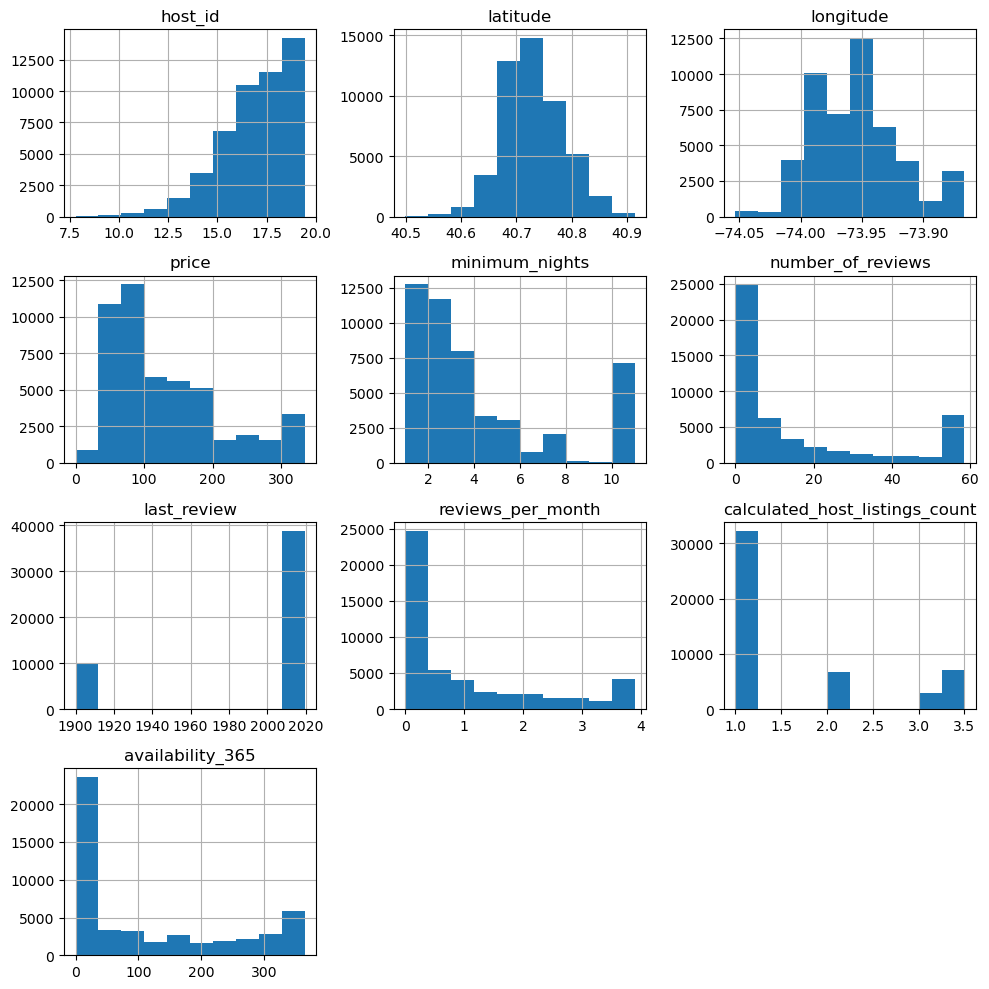

In [ ]:
# Visualize the modified dataset
new_york_city.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()